# Making Necessary Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing Data

In [2]:
df=pd.read_csv('kc_house_data.csv')

In this dataset, it is used these feature:

- id: house id
- date: date that the house was bought.
- price: house price
- bedrooms: number of bedroom
- bathrooms: number of bathroom
- sqft_living: Square foot Living
- sqft_lot: Square foot Lot
- floors: Number of floor
- waterfront: waterfront
- view: Number of view
- condition: condition
- grade: grade
- sqft_above: Square foot above
- sqft_basement: Square foot basement
- yr_built: year that house was built
- yr_renovated: year that house was renovated
- zipcode: zipcode
- lat: latitude
- long: longitude
- sqft_living15: Square foot Living in 2015
- sqft_lot15: Square foot Lot in 2015


In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [5]:
df['date']=pd.to_datetime(df['date'])

In [6]:
df.date

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]

# Preparing the Test set

In [7]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

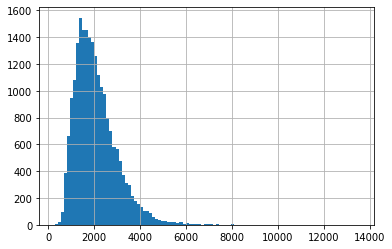

In [8]:
df['sqft_living'].hist(bins=100)

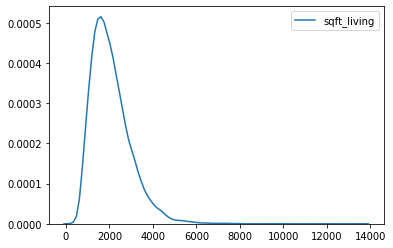

In [9]:
sns.kdeplot(df['sqft_living'])

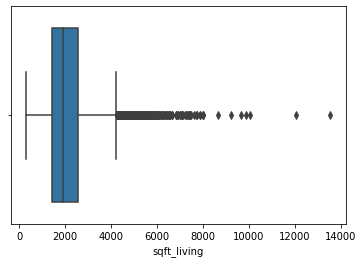

In [10]:
#we do have a long tail and outliers
#let's also confirm by looking at boxplot
sns.boxplot(df['sqft_living'])

In [11]:
#one way to tackel the problem is by eliminating the outliers and training the model, or we can also used stratified sampling
#let's first check the most common range of highly correlated feature that is sqft_living

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [13]:
#it can be seen that most of the data is divided into 1.5-2.5

In [14]:
#let's do a stratified random split
df['sqft_living_cat']=pd.cut(df['sqft_living'],bins=[0.,1.5e3,2.5e3,3.5e3,4.5e3,5.5e3,np.inf],labels=[1,2,3,4,5,6])

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit 

In [16]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=101)

In [17]:
for train_index, test_index in split.split(df,df['sqft_living_cat']):
    strat_train_set=df.loc[train_index]
    strat_test_set=df.loc[test_index]

In [19]:
#let's check the proportion it has gathered
df['sqft_living_cat'].value_counts()/len(df)

2    0.443529
1    0.292879
3    0.192616
4    0.053949
5    0.011475
6    0.005552
Name: sqft_living_cat, dtype: float64

In [20]:
strat_train_set['sqft_living_cat'].value_counts()/len(df)

2    0.354833
1    0.234303
3    0.154074
4    0.043168
5    0.009161
6    0.004442
Name: sqft_living_cat, dtype: float64

In [29]:
for set_ in strat_test_set,strat_train_set:
    set_.drop('sqft_living_cat',axis=1,inplace=True)

# Exploring the data

In [30]:
#let's explore the data
housing=strat_train_set.drop('price',axis=1)
housing_label=strat_train_set['price'].copy

In [31]:
housing.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2800,8091411040,2014-07-01,4,2.50,1970,6600,2.0,0,0,3,7,1970,0,1987,0,98030,47.3491,-122.168,1970,7682
13702,5702380730,2014-08-23,2,2.00,1340,7605,1.0,0,0,3,7,1340,0,1992,0,98022,47.1936,-121.981,1670,7136
13192,7697800040,2014-08-26,4,2.75,2150,9820,1.0,0,0,4,8,1220,930,1979,0,98011,47.7758,-122.200,2060,9830
14133,4074300150,2015-04-17,4,1.75,1560,7200,1.0,0,0,3,6,860,700,1943,0,98115,47.7001,-122.279,1420,7200
1187,6398000171,2014-07-10,2,2.00,2930,14057,1.0,0,2,4,8,1680,1250,1980,0,98070,47.4025,-122.463,2234,61011
